# Fitting simple models

In this chapter we will focus on how to compute the measures of central tendency and variability that were covered in the previous chapter.  Most of these can be computed using a built-in Python function, but we will show how to do them manually in order to give some intuition about how they work. First let's load the NHANES data that we will use for our examples.

In [1]:
from nhanes.load import load_NHANES_data
nhanes_data = load_NHANES_data()
adult_nhanes_data = nhanes_data.query('AgeInYearsAtScreening > 17')

/Users/johnbutler/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3248: DtypeWarning: Columns (142) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Since we will be analyzing the `StandingHeightCm` variable, we should exclude any observations that are missing this measurement.  We will also recode the variable to be called `Height` in order to simplify the coding later.

In [2]:
adult_nhanes_data = adult_nhanes_data.dropna(subset=['StandingHeightCm']).rename(columns={'StandingHeightCm': 'Height'})

## Mean
The mean is defined as the sum of values divided by the number of values being summed:
$$
\bar{X} = \frac{\sum_{i=1}^{n}x_i}{n}
$$
Let's say that we want to obtain the mean height for adults in the NHANES database (contained in the data `Height` that we generated above).  We would sum the individual heights (using the `.sum()` operator) and then divide by the number of values:

In [3]:
adult_nhanes_data['Height'].sum() / adult_nhanes_data['Height'].shape[0]

166.3623438648053

There is, of course, a built-in operator for the data frame called `.mean()` that will compute the mean.  

In [4]:
adult_nhanes_data['Height'].mean()

166.36234386480572

## Median
The median is the middle value after sorting the entire set of values. First we sort the data in order of their values:

In [5]:
height_sorted = adult_nhanes_data['Height'].sort_values()

Next we find the median value.  If there is an odd number of values in the list, then this is just the value in the middle, whereas if the number of values is even then we take the average of the two middle values.  We can determine whether the number of items is even by dividing the length by two and seeing if there is a remainder; we do this using the `%%` operator, which is known as the *modulus* and returns the remainder:

In [6]:
height_length_mod_2 = height_sorted.shape[0] % 2

Here we will test whether the remainder is equal to one; if it is, then we will take the middle value, otherwise we will take the average of the two middle values.  We can do this using an if/else structure, which executes different processes depending on which of the arguments are true. Here is a simple example:

In [7]:
if 1 > 2:
    print('1 > 2')
else:
    print('1 is not greater than two!')

1 is not greater than two!


For our example, we can use an if statement to determine how to compute the median, depending on whether there is an odd or even number of data points.

In [8]:
import numpy as np
if height_length_mod_2 == 1: 
    # odd number values - take the single midpoint
    midpoint = int(np.ceil(height_sorted.shape[0] / 2))
    median = height_sorted[midpoint]
else:
    # even number of values - need to average the two middle points
    midpoints = [int((height_sorted.shape[0] / 2) - 1),
                 int(height_sorted.shape[0] / 2)]
    median = height_sorted.iloc[midpoints].mean()

There is a lot going on there, so let's unpack it.  The first line of the if statement asks whether the remainder is equal to one --- if so, then it executes the lines that are indented below it. Python uses indentation as part of its syntax, so you always need to be very careful about indentation.  If the remainder is one, that means that the number of observations is odd, and thus that we can simply take the single middle point.  We determine this by dividing the number of observations by two, and then rounding up (which is what the `np.ceil()` function does).  Finally, we have to convert this number into an integer using the `int()` function, since we can only use integers to index a data frame.  
If the first test is false --- that is, if the remainder is zero --- then, the second section of code (after the `else` statement) will be executed instead.  Here we need to find the two midpoints and average them, so we create a new list containing those two points, and then use that index our data and then take the mean.

## Mode
The mode is the most frequent value that occurs in a variable. For example, let's say that we had the following data:

In [9]:
import pandas as pd
toy_data = pd.DataFrame({'myvar': ['a', 'a', 'b', 'c']})

We can see by eye that the mode is "a" since it occurs more often than the others.  To find it computationally, let's use the `.value_counts()` operator to find the frequency of each value:

In [10]:
myvar_frequencies = toy_data['myvar'].value_counts()
myvar_frequencies

a    2
b    1
c    1
Name: myvar, dtype: int64

Now let's find the highest frequency, using the `.max()` operator:

In [11]:
max_frequency = myvar_frequencies.max()
max_frequency

2

Now we can find the values that have the maximum frequency:

In [12]:
mode = myvar_frequencies.loc[myvar_frequencies == max_frequency].index.values

## Creating functions
It is often useful to create our own custom *function* in order to perform a particular action. Let's do that for our mode function:

In [13]:
def my_mode_function(input):
    """
    A function to compute the mode. 

    Inputs:
    ------
    input: a pandas Series

    Outputs:
    --------
    mode: an array containing the mode values
    """

    # make sure the input is a pandas series
    input = pd.Series(input)

    # compute the frequency distribution
    frequencies = input.value_counts()

    # compute the maximum frequency
    max_frequency = frequencies.max()

    # find the values matching the maximum frequency (i.e. the mode)
    mode = frequencies.loc[
        frequencies == max_frequency].index.values

    return(mode)

Let's look at this one section at a time.
The first row tells Python to define a new function, called "my_mode_function", which takes in a single variable that will be called "input". This variable only exists inside the function; you can't access it from the outside.  
The next section, surrounded by triple-quotes, is known as a *docstring*, and it provides documentation about our function. It's always a good idea to write a docstring that describes what the function does, what kinds of inputs it expects, and what kind of output it produces.
The next line converts the input to a particular kind of variable called a pandas *Series*; this is the same kind of variable as a column in a data frame.  Including this command allows our function to take in various types of variables (including Series and lists) and treat them as if they were a Series, using the operators that are available such as `.value_counts()`.
The remaining lines perform the computations that we performed above to compute the mean.
The final line tells Python to return the value of the mode when the function is called.  Let's see this in action:

In [14]:
my_mode_function(['a', 'a', 'b', 'c'])

array(['a'], dtype=object)

Let's also make sure that it works properly if there are multiple modes:

In [15]:
my_mode_function(['a', 'a', 'b', 'c', 'c'])

array(['a', 'c'], dtype=object)

## Variability
Let's first compute the *variance*, which is the average squared difference between each value and the mean.  Let's do this with our cleaned-up version of the height data, but instead of working with the entire dataset, let's take a random sample of 150 individuals:

In [16]:
sample_size = 150
height_sample = adult_nhanes_data.sample(sample_size)['Height']

We could have simply entered the number 150 into the sample function, but by first creating a new variable called `sample_size` and setting it to 150, we make it clearer to the reader of the code exactly what this number refers to.  It's always good practice to create a new variable rather than typing a number directly into a formula.

To compute the variance we need we need to first compute the sum of squared errors from the mean. In Python, we can square a vector using `**2`:

In [17]:
sum_of_squared_errors = np.sum((height_sample - height_sample.mean())**2)

Then we divide by N - 1 to get the estimated variance:

In [18]:
variance_estimate = sum_of_squared_errors / (height_sample.shape[0] - 1)
variance_estimate

98.0863539149888

We can compare this to the built-in `.var()` operator:

In [19]:
height_sample.var()

98.08635391498878

We can get the *standard deviation* by simply taking the square root of the variance:

In [20]:
std_dev_estimate = np.sqrt(variance_estimate)
std_dev_estimate

9.903855507578289

Which is the same value obtained using the built-in `.std()` operator:

In [21]:
height_sample.std()

9.903855507578287

## Z-scores
A Z-score is obtained by first subtracting the mean and then dividing by the standard deviation of a distribution.  Let's do this for the `height_sample` data.

In [22]:
mean_height = height_sample.mean()
sd_height = height_sample.std()

z_height = (height_sample - mean_height) / sd_height

Now let's plot the histogram of Z-scores alongside the histogram for the original values. Matplotlib allows us to create a grid of figures using the `plt.subplot()` function.  Let's see this in action:

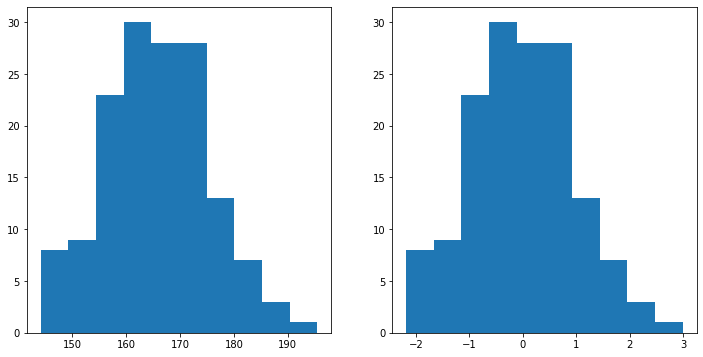

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(height_sample)

plt.subplot(1, 2, 2)
plt.hist(z_height)
plt.show()

You will notice that the shapes of the histograms are exactly the same. We can also see this by plotting the two variables against one another in a scatterplot:

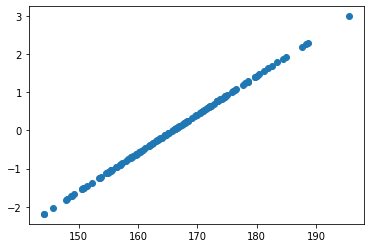

In [24]:
plt.scatter(height_sample, z_height)

You see here that they fall along a straight line, meaning that they are perfectly related to each other exactly --- the only difference is where they are located on the number line.